## Duży lotek is a lottery game where a player selects six numbers. During the lotter 49 numbers are drawn. The prize depends on a number of matches ( there must be three at least).
## In this notebook I want to check if there is any system that enhances chance of winning a prize. 6408 lottery results are examinated.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Importing the data from a website

In [2]:
data=pd.read_csv('http://www.mbnet.com.pl/dl.txt',header=None)

In [3]:
data.head()

,0,1,2,3,4,5
0,1. 27.01.1957 8,12,31,39,43,45
1,2. 03.02.1957 5,10,11,22,25,27
2,3. 10.02.1957 18,19,20,26,45,49
3,4. 17.02.1957 2,11,14,37,40,45
4,5. 24.02.1957 8,10,15,35,39,49


### We want the table in the form: index - date, six columns for each number

In [4]:
#extracting the first number
first_number=data[0].str.extract('(\d+$)').astype(int)
#extracting the date
data['date']=data[0].str.extract('(\d+\.\d+\.\d+)')

In [5]:
data[0]=first_number

In [6]:
#changing string type to datetime format
data['date']=pd.to_datetime(data['date'],format='%d.%m.%Y')

In [7]:
data.index=data['date']
del data['date']

In [8]:
#renaming the columns name
data.rename(columns={0:1,1:2,2:3,3:4,4:5,5:6},inplace=True)

In [9]:
data.head()

,1,2,3,4,5,6
date,,,,,,
1957-01-27,8,12,31,39,43,45
1957-02-03,5,10,11,22,25,27
1957-02-10,18,19,20,26,45,49
1957-02-17,2,11,14,37,40,45
1957-02-24,8,10,15,35,39,49


In [10]:
#we want to create a table with each number count
num_count=pd.concat([data[1].value_counts(),
                    data[2].value_counts(),
                    data[3].value_counts(),
                    data[4].value_counts(),
                    data[5].value_counts(),
                    data[6].value_counts()],axis=1,join='outer')


In [11]:
num_count.head()

,1,2,3,4,5,6
1,796.0,NaN,NaN,NaN,NaN,NaN
2,701.0,80.0,NaN,NaN,NaN,NaN
3,630.0,145.0,5.0,NaN,NaN,NaN
4,588.0,217.0,16.0,NaN,NaN,NaN
5,487.0,247.0,36.0,4.0,NaN,NaN


In [12]:
num_count.replace(np.nan,0,inplace=True)

### how to interpret the num_count table? number 1 was at the first place 796 times (it could not be at the second place because the numbers are sorted) number 5 was 487 times at the first place, 247 times at the second place and so on

In [13]:
num_count=num_count.iloc[:,:].astype(int)
num_count.head()

,1,2,3,4,5,6
1,796,0,0,0,0,0
2,701,80,0,0,0,0
3,630,145,5,0,0,0
4,588,217,16,0,0,0
5,487,247,36,4,0,0


In [14]:
#now we want to sum all the numbers
num_count_sum=num_count.sum(axis=1)
num_count_sum

1     796
2     781
3     780
4     821
5     774
6     830
7     765
8     764
9     788
10    767
11    781
12    722
13    810
14    783
15    807
16    761
17    837
18    800
19    778
20    793
21    832
22    794
23    761
24    825
25    813
26    781
27    831
28    797
29    799
30    758
31    803
32    787
33    762
34    849
35    769
36    805
37    784
38    819
39    753
40    785
41    766
42    804
43    712
44    745
45    803
46    787
47    730
48    705
49    751
dtype: int64

In [16]:
#let's plot the results
number=num_count_sum.index
count=num_count_sum.values

#the theoretical average result for an arbitrary number
from scipy.special import binom

t_res=binom(48,5)/binom(49,6)
print('theoretical chance of drawing a random number during one lotter is {:.3f}'.format(t_res))
print('for {} draws it is {} times'.format(data.shape[0],round(t_res*data.shape[0],0)))


#let's check the theoretical result with a simulation

num=np.arange(1,50)

#checking the results for a number 10
counter=0
#number of draws
number_of_drawing=100000
for i in range(number_of_drawing):
    #drawing 6 numbers out of 49
    results_t=np.random.choice(num,6,replace=False)
    if 10 in results_t: counter += 1

print('number of 10 was drawn {} times for {} simulations '.format(counter,number_of_drawing))
print('the chance is {}'.format(counter/number_of_drawing))

theoretical chance of drawing a random number during one lotter is 0.122
for 6408 draws it is 785.0 times
number of 10 was drawn 12370 times for 100000 simulations 
the chance is 0.1237


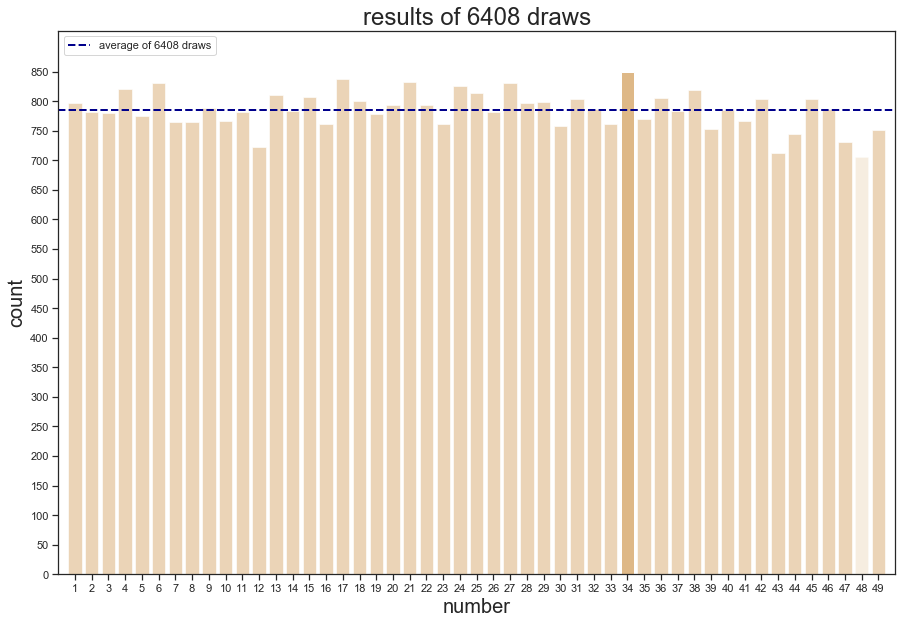

In [17]:
#plotting
sns.set(style="ticks", color_codes=True)
fig, ax = plt.subplots(figsize=(15,10))
res=ax.bar(number,count,align='center',alpha=0.6,color='BurlyWood')
ax.axhline(round(t_res*data.shape[0],0), color='DarkBlue', linewidth=2, linestyle='--', label='average of {} draws'.format(data.shape[0]))
ax.set(xlim=(0,50),
       ylim=(0,count.max()+70),
       xlabel='number',
       ylabel='count',
       xticks=np.arange(1,50),
       yticks=np.arange(0,900,50))
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.set_title('results of {} draws'.format(data.shape[0]), fontsize=24)
ax.legend(loc='upper left')

#setting colors for the max and min counts
for bar, height in zip(res, count):
    if height == count.max():
        bar.set(alpha=1)
    if height == count.min():
        bar.set(alpha=0.25)

plt.show()


In [19]:
#top six numbers
top6=num_count_sum.nlargest(6).index
top6

Int64Index([34, 17, 21, 27, 6, 24], dtype='int64')

In [18]:
#would it make a sense to select top six numbers for every lottery?
res_list=np.array([data[1],data[2],data[3],data[4],data[5],data[6]]).T

In [20]:
top6=np.array(top6)
matches=[]
for i in res_list:
    matches.append(6-np.unique(np.isin(top6,i),return_counts=True)[1][0])
m,n=np.unique(matches,return_counts=True)

for i,j in zip(m,n):
    print('number of {} matches: {} '.format(i,j))


number of 0 matches: 2618 
number of 1 matches: 2729 
number of 2 matches: 917 
number of 3 matches: 135 
number of 4 matches: 9 


### conclusion:
- 1. it is impossible to create a system of selecting numbers in order to increase chance of winning
- 2. There is no point in selecting the six most offen drawn numbers. Ones would get 9 fours and 135 threes
